## Causality between Rainfall and Water Level


Granger causality is a statistical hypothesis test to determine whether one time series can predict another. 
Essentially, it assesses whether past values of one variable contain useful information for predicting future values of another variable. <br>


Since we have multiple predictor variables, we would test for multivariate Granger Causality. We would make use of VAR (Vector Autoregressive) models.

Hypothesis Test:

H_0: None of the rainfall time series Granger-cause the water level time series. <br>
H_A: At least one of the rainfall time series Granger-causes the water level time series. 

Python statsmodels package: https://www.statsmodels.org/stable/vector_ar.html

Sample Paper (Multivariate Granger Causality): https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3971884/

Multivariate Granger-Causality: https://www.statsmodels.org/dev/generated/statsmodels.tsa.vector_ar.var_model.VARResults.test_causality.html

In [1]:
import pandas as pd
import os

BASE_DIR_PATH = '/Users/neilb/Documents/dsci_thesis/Datasets'
DATASET_FILE = os.path.join(BASE_DIR_PATH, 'compiled_data_2016_2017.csv')

In [2]:
df = pd.read_csv(DATASET_FILE)
df.head()

,Unnamed: 0,index,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,Waterlevel_Montalban,Discharge_Sto_Nino,Discharge_San_Jose,Cross_Section_Sto_Nino,Cross_Section_Montalban,Velocity_Sto_Nino,Velocity_Montalban,datetime,t,x
0,0,0,0,1,2,0,0,12.18,21.03,21.033407,14.842428,803.88,630.9,0.026165,0.023526,2016-01-01 00:00:00,0.0,14420
1,1,1,0,1,1,1,0,12.19,21.03,21.280072,14.842428,804.54,630.9,0.026450,0.023526,2016-01-01 01:00:00,3600.0,14420
2,2,2,1,1,1,0,1,12.19,21.03,21.280072,14.842428,804.54,630.9,0.026450,0.023526,2016-01-01 02:00:00,7200.0,14420
3,3,3,0,0,0,1,0,12.20,21.03,21.529056,14.842428,805.20,630.9,0.026738,0.023526,2016-01-01 03:00:00,10800.0,14420
4,4,4,1,1,1,0,0,12.20,21.03,21.529056,14.842428,805.20,630.9,0.026738,0.023526,2016-01-01 04:00:00,14400.0,14420


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               17520 non-null  int64  
 1   index                    17520 non-null  int64  
 2   Rainfall_Aries           17520 non-null  int64  
 3   Rainfall_Boso            17520 non-null  int64  
 4   Rainfall_Campana         17520 non-null  int64  
 5   Rainfall_Nangka          17520 non-null  int64  
 6   Rainfall_Oro             17520 non-null  int64  
 7   Waterlevel_Sto_Nino      17520 non-null  float64
 8   Waterlevel_Montalban     17520 non-null  float64
 9   Discharge_Sto_Nino       17520 non-null  float64
 10  Discharge_San_Jose       17520 non-null  float64
 11  Cross_Section_Sto_Nino   17520 non-null  float64
 12  Cross_Section_Montalban  17520 non-null  float64
 13  Velocity_Sto_Nino        17520 non-null  float64
 14  Velocity_Montalban    

In [4]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               17520 non-null  int64         
 1   index                    17520 non-null  int64         
 2   Rainfall_Aries           17520 non-null  int64         
 3   Rainfall_Boso            17520 non-null  int64         
 4   Rainfall_Campana         17520 non-null  int64         
 5   Rainfall_Nangka          17520 non-null  int64         
 6   Rainfall_Oro             17520 non-null  int64         
 7   Waterlevel_Sto_Nino      17520 non-null  float64       
 8   Waterlevel_Montalban     17520 non-null  float64       
 9   Discharge_Sto_Nino       17520 non-null  float64       
 10  Discharge_San_Jose       17520 non-null  float64       
 11  Cross_Section_Sto_Nino   17520 non-null  float64       
 12  Cross_Section_Montalban  17520 n

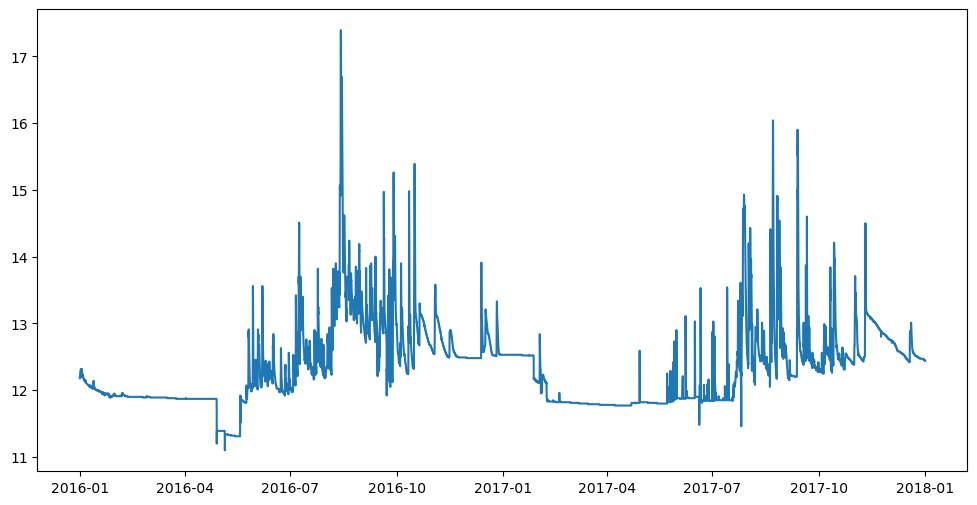

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
waterlevel = plt.plot(df["datetime"], df["Waterlevel_Sto_Nino"])

In [7]:
#Check for Stationarity and Autocorrelation

from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
adfuller(df["Waterlevel_Sto_Nino"])[1]
# Since p val is less than 0.05, the time series is stationary. 

4.1565836814150146e-08

In [8]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(df["Waterlevel_Sto_Nino"])

# Since all the p-values from lags 1-10 are less than 0.05, we conclude that the time series is autocorrelated. 

,lb_stat,lb_pvalue
1,17326.328437,0.0
2,34275.575894,0.0
3,50800.063541,0.0
4,66900.750979,0.0
5,82591.224571,0.0
6,97884.921983,0.0
7,112794.634998,0.0
8,127338.985959,0.0
9,141539.259632,0.0
10,155419.289238,0.0


In [9]:
print(adfuller(df["Rainfall_Aries"])[1])
print(adfuller(df["Rainfall_Boso"])[1])
print(adfuller(df["Rainfall_Campana"])[1])
print(adfuller(df["Rainfall_Nangka"])[1])
print(adfuller(df["Rainfall_Oro"])[1])

# All of the rainfall time series are stationary. 

0.0
0.0
0.0
0.0
0.0


## Pairwise Granger Causality Tests
- Each rainfall station in isolation Granger-causes the water level in Sto. Nino when considering lags of periods one to ten.

In [10]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR

print("Aries Causes Sto Nino?")
grangercausalitytests(df[["Waterlevel_Sto_Nino", "Rainfall_Aries"]], 10)

Aries Causes Sto Nino?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2484.5303, p=0.0000  , df_denom=17516, df_num=1
ssr based chi2 test:   chi2=2484.9558, p=0.0000  , df=1
likelihood ratio test: chi2=2323.7909, p=0.0000  , df=1
parameter F test:         F=2484.5303, p=0.0000  , df_denom=17516, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=487.6664, p=0.0000  , df_denom=17513, df_num=2
ssr based chi2 test:   chi2=975.6113, p=0.0000  , df=2
likelihood ratio test: chi2=949.4128, p=0.0000  , df=2
parameter F test:         F=487.6664, p=0.0000  , df_denom=17513, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=322.6806, p=0.0000  , df_denom=17510, df_num=3
ssr based chi2 test:   chi2=968.4288, p=0.0000  , df=3
likelihood ratio test: chi2=942.6065, p=0.0000  , df=3
parameter F test:         F=322.6806, p=0.0000  , df_denom=17510, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based

{1: ({'ssr_ftest': (2484.5302757859886, 0.0, 17516.0, 1),
   'ssr_chi2test': (2484.955806205454, 0.0, 1),
   'lrtest': (2323.7909026444468, 0.0, 1),
   'params_ftest': (2484.530275786167, 0.0, 17516.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (487.66643269057556, 7.879047266792252e-207, 17513.0, 2),
   'ssr_chi2test': (975.611325058357, 1.4082913845220093e-212, 2),
   'lrtest': (949.4127965915395, 6.880669470690715e-207, 2),
   'params_ftest': (487.6664326906576, 7.879047266177324e-207, 17513.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (322.68061775913316, 6.040409629023107e-204, 17510.0, 3),
   'ssr_chi2test': (968.4288488783669, 1.269898729955765e-209, 3),
   'lrtest': (942.6064808869123, 5.0718762831518096e-204, 3),
   'params_ftest': (322.68061775912616, 6.040409629079418e-204, 17510.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])]),
 

In [ ]:
print("Boso-Boso Causes Sto Nino?")
grangercausalitytests(df[["Waterlevel_Sto_Nino", "Rainfall_Boso"]], 10)

In [ ]:
print("Campana Causes Sto Nino?")
grangercausalitytests(df[["Waterlevel_Sto_Nino", "Rainfall_Campana"]], 10)

In [ ]:
print("Mt.Nangka Causes Sto Nino?")
grangercausalitytests(df[["Waterlevel_Sto_Nino", "Rainfall_Nangka"]], 10)

In [ ]:
print("Mt.Oro Causes Sto Nino?")
grangercausalitytests(df[["Waterlevel_Sto_Nino", "Rainfall_Oro"]], 10)

## Multivariate Granger Causality Tests

In [58]:
# Create a VAR model

model = VAR(df[["Waterlevel_Sto_Nino","Rainfall_Aries", "Rainfall_Boso", "Rainfall_Campana", "Rainfall_Nangka", "Rainfall_Oro"]])

In [59]:
# Lag Order Selection
# For parsimony, we only consider lags up to 10. 
results = model.fit(maxlags = 10, ic = 'bic')
# VAR(2) was selected.
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Sep, 2024
Time:                     17:05:08
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                  -0.450391
Nobs:                     17518.0    HQIC:                 -0.473599
Log likelihood:          -144816.    FPE:                   0.615702
AIC:                    -0.484992    Det(Omega_mle):        0.612968
--------------------------------------------------------------------
Results for equation Waterlevel_Sto_Nino
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          0.309148         0.016491           18.747           0.000
L1.Waterlevel_Sto_Nino         0.851477         0.007639          111.468           0.000
L1.Rainfal

In [61]:
granger = results.test_causality('Waterlevel_Sto_Nino', ['Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro'], kind='f')

In [65]:
granger.summary()

Test statistic,Critical value,p-value,df
135.7,1.831,0.000,"(10, 105030)"


Conclusion: The five rainfall stations Granger-cause the water level at Sto. Nino.